<a href="https://colab.research.google.com/github/christopher-2000/Sparks-Foundation/blob/main/ML_Lab1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ML Lab Assignment 1
##### M G Christopher
##### 2018BCS0030

#### 1. Importing Libraries

In [53]:
import csv
import numpy as np
import pandas as pd
from pandas import read_csv
import sklearn as sc
from sklearn import metrics
import matplotlib.pyplot as plt

print("Libraries imported")



Libraries imported


#### 2. Loading Data

In [15]:
path = r"/content/usedcars.csv"
data = read_csv(path)
print(data.shape)
print(data[:5])





(150, 6)
   year model  price  mileage   color transmission
0  2011   SEL  21992     7413  Yellow         AUTO
1  2011   SEL  20995    10926    Gray         AUTO
2  2011   SEL  19995     7351  Silver         AUTO
3  2011   SEL  17809    11613    Gray         AUTO
4  2012    SE  17500     8367   White         AUTO


#### 3. Data Preprocessing and visualization

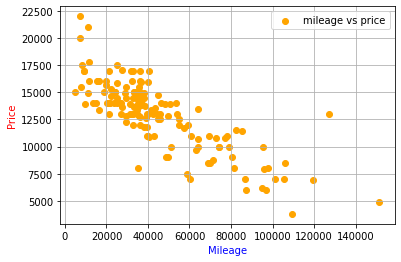

In [34]:
datarray = []
price = []
mileage = []
for i in range(150):
    datarray.append([data['mileage'][i],data['price'][i]])
    price.append(data['price'][i])
    mileage.append(data['mileage'][i])

np.random.shuffle(datarray)
train = datarray[:120]
test = datarray[120:]


plt.scatter(mileage,price,color = 'orange',label='mileage vs price')
plt.xlabel('Mileage',color='blue')
plt.ylabel('Price',color='red')
plt.grid()
plt.legend()
plt.show()

#### 4. Finding Coefficients of Linear regression line 

In [45]:
def mean(values):
	return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

# Y = mX + C
c,m = coefficients(train)
print("The Equation of the line : Y = {} * X + {} ".format(m,c))

The Equation of the line : Y = -0.0949270250995719 * X + 17229.698165737314 


#### 5. Linear Regression visualization

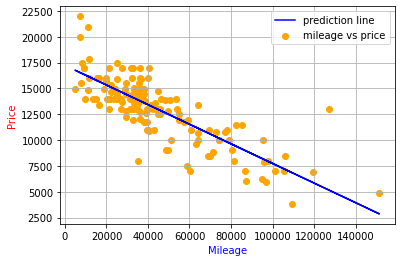

In [46]:
x =np.array(mileage)
y = -0.0949270250995719 * x + 17229.698165737314 
plt.scatter(mileage,price,color = 'orange',label='mileage vs price')
plt.plot(x,y, color='blue', label='prediction line')
plt.xlabel('Mileage',color='blue')
plt.ylabel('Price',color='red')
plt.grid()
plt.legend()
plt.show()

#### 6. Evaluating our model using test dataset

In [50]:
y_test = []
y_pred = []
for i in test:
    y_test.append(i[1])
    yval = -0.0949270250995719 * i[0] + 17229.698165737314
    y_pred.append(yval)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df[:10]


,Actual,Predicted
0,14299,13769.892882
1,13950,16332.637779
2,13384,13305.225094
3,14477,14429.255998
4,10836,13401.291243
5,9651,11221.197185
6,4899,2850.247331
7,14677,15127.729049
8,12595,13507.514585
9,13895,12656.683659


In [55]:
print('Accuracy Score:', 
      metrics.r2_score(y_test, y_pred))

Accuracy Score: 0.6517064430561749
